## Named Entity Recognition(NER) using NLTK & SpaCy

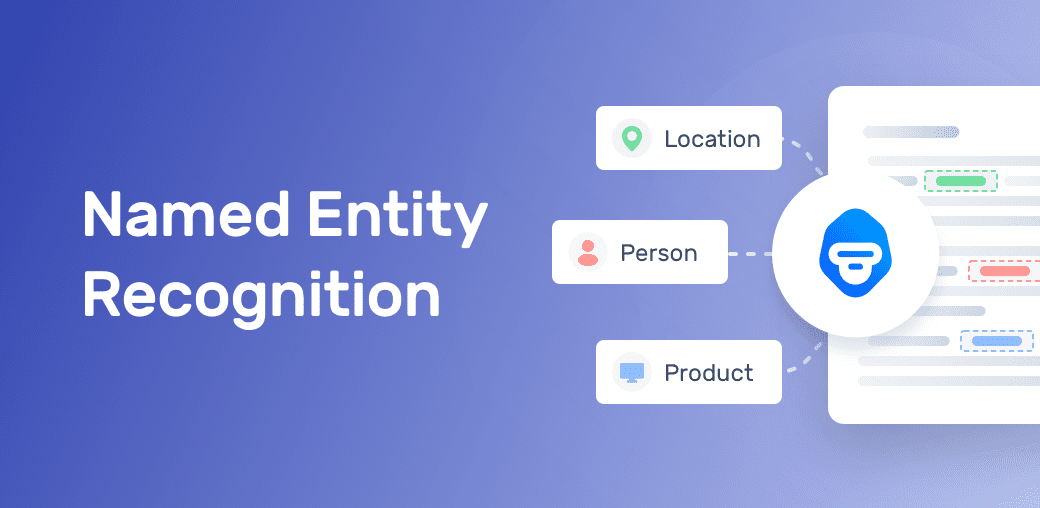

Any word which reprsents a person, organization, location etc. is a Named Entity. Named entity recognition is a subtask of Information Extraction and is the process of identifying words which are named entities in a given text. It is also called entity identification or entity chunking

### Three approaches

- Basic NLTK algorithm
   - with word segmentation
   - with sentence segmentation
- Stanford NLP NER
- Using Spacy

# **Basic NLTK algorithm**

In [61]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [62]:
text = "Apple acquired Zoom in China on Wednesday 6th May 2020.\
This news has made Apple and Google stock jump by 5% on Dow Jones Index in the \
United States of America"

In [63]:
#tokenize to words
words = nltk.word_tokenize(text)

In [64]:
words

['Apple',
 'acquired',
 'Zoom',
 'in',
 'China',
 'on',
 'Wednesday',
 '6th',
 'May',
 '2020.This',
 'news',
 'has',
 'made',
 'Apple',
 'and',
 'Google',
 'stock',
 'jump',
 'by',
 '5',
 '%',
 'on',
 'Dow',
 'Jones',
 'Index',
 'in',
 'the',
 'United',
 'States',
 'of',
 'America']

In [65]:
#Part of speech tagging
pos_tags = nltk.pos_tag(words)
pos_tags

[('Apple', 'NNP'),
 ('acquired', 'VBD'),
 ('Zoom', 'NNP'),
 ('in', 'IN'),
 ('China', 'NNP'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('6th', 'CD'),
 ('May', 'NNP'),
 ('2020.This', 'CD'),
 ('news', 'NN'),
 ('has', 'VBZ'),
 ('made', 'VBN'),
 ('Apple', 'NNP'),
 ('and', 'CC'),
 ('Google', 'NNP'),
 ('stock', 'NN'),
 ('jump', 'NN'),
 ('by', 'IN'),
 ('5', 'CD'),
 ('%', 'NN'),
 ('on', 'IN'),
 ('Dow', 'NNP'),
 ('Jones', 'NNP'),
 ('Index', 'NNP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('of', 'IN'),
 ('America', 'NNP')]

In [66]:
#check nltk help for description of the tag
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [67]:
chunks = nltk.ne_chunk(pos_tags, binary=True) #either NE or not NE
for chunk in chunks:
    print(chunk)

(NE Apple/NNP)
('acquired', 'VBD')
('Zoom', 'NNP')
('in', 'IN')
(NE China/NNP)
('on', 'IN')
('Wednesday', 'NNP')
('6th', 'CD')
('May', 'NNP')
('2020.This', 'CD')
('news', 'NN')
('has', 'VBZ')
('made', 'VBN')
(NE Apple/NNP)
('and', 'CC')
(NE Google/NNP)
('stock', 'NN')
('jump', 'NN')
('by', 'IN')
('5', 'CD')
('%', 'NN')
('on', 'IN')
('Dow', 'NNP')
('Jones', 'NNP')
('Index', 'NNP')
('in', 'IN')
('the', 'DT')
(NE United/NNP States/NNPS)
('of', 'IN')
(NE America/NNP)


In [68]:
entities =[]
labels =[]

In [69]:
for chunk in chunks:
  #The hasattr() function returns True if the specified object has the specified attribute, otherwise False.
  if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())

In [70]:
import pandas as pd

In [71]:
entities_df=pd.DataFrame({"Entities":entities,"labels":labels})

In [72]:
entities_df

,Entities,labels
0,Apple,NE
1,China,NE
2,Apple,NE
3,Google,NE
4,United States,NE
5,America,NE


missing some names 

In [73]:
chunks = nltk.ne_chunk(pos_tags, binary=False) #either NE or not NE
for chunk in chunks:
    print(chunk)

(PERSON Apple/NNP)
('acquired', 'VBD')
(PERSON Zoom/NNP)
('in', 'IN')
(GPE China/NNP)
('on', 'IN')
('Wednesday', 'NNP')
('6th', 'CD')
('May', 'NNP')
('2020.This', 'CD')
('news', 'NN')
('has', 'VBZ')
('made', 'VBN')
(PERSON Apple/NNP)
('and', 'CC')
(ORGANIZATION Google/NNP)
('stock', 'NN')
('jump', 'NN')
('by', 'IN')
('5', 'CD')
('%', 'NN')
('on', 'IN')
(PERSON Dow/NNP Jones/NNP Index/NNP)
('in', 'IN')
('the', 'DT')
(GPE United/NNP States/NNPS)
('of', 'IN')
(GPE America/NNP)


In [74]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())

In [75]:
entities_df=pd.DataFrame({"Entities":entities,"labels":labels})

In [76]:
entities_df

,Entities,labels
0,Apple,PERSON
1,Zoom,PERSON
2,China,GPE
3,Apple,PERSON
4,Google,ORGANIZATION
5,Dow Jones Index,PERSON
6,United States,GPE
7,America,GPE


## Basic Named Entity (NE) tagging using NLTK - Sentence based

In [77]:
entities = []
labels = []

In [78]:
sentence = nltk.sent_tokenize(text)
for sent in sentence:
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)),binary=True):
        if hasattr(chunk,'label'):
            entities.append(' '.join(c[0] for c in chunk))
            labels.append(chunk.label())

In [79]:
entities_df=pd.DataFrame({"Entities":entities,"labels":labels})

In [80]:
entities_df

,Entities,labels
0,Apple,NE
1,China,NE
2,Apple,NE
3,Google,NE
4,United States,NE
5,America,NE


## Using Spacy

In [81]:
text="Google was founded in September 1998 by Larry Page and Sergey Brin while they were Ph.D. students at Stanford University in California. Together they own about 14 percentge  of its publicly-listed shares and control 56 percentge  of the stockholder voting power through super-voting stock. The complex became known as the Googleplex, a play on the word googolplex, the number one followed by a googol zeroes. Three years later, Google bought the property from SGI for $319 million"

In [82]:
import spacy 
from spacy import displacy

## small model

In [83]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [84]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [85]:
doc=nlp(text)

In [86]:
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Google 0 6 ORG
September 1998 22 36 DATE
Larry Page 40 50 PERSON
Sergey Brin 55 66 PERSON
Ph.D. 83 88 WORK_OF_ART
Stanford University 101 120 ORG
California 124 134 GPE
about 14 154 162 CARDINAL
56 216 218 CARDINAL
Googleplex 322 332 ORG
one 376 379 CARDINAL
Three years later 409 426 DATE
Google 428 434 ORG
SGI 460 463 GPE
$319 million 468 480 MONEY


In [87]:
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

In [88]:
entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels_sm':labels,'Position_Start_sm':position_start, 'Position_End_sm':position_end})

df

,Entities,Labels_sm,Position_Start_sm,Position_End_sm
0,(Google),ORG,0,6
1,"(September, 1998)",DATE,22,36
2,"(Larry, Page)",PERSON,40,50
3,"(Sergey, Brin)",PERSON,55,66
4,(Ph.D.),WORK_OF_ART,83,88
5,"(Stanford, University)",ORG,101,120
6,(California),GPE,124,134
7,"(about, 14)",CARDINAL,154,162
8,(56),CARDINAL,216,218
9,(Googleplex),ORG,322,332


## medium  model

In [89]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [90]:
import en_core_web_md
nlp = en_core_web_md.load()

In [91]:
entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels_sm':labels,'Position_Start_sm':position_start, 'Position_End_sm':position_end})


In [92]:
df

,Entities,Labels_sm,Position_Start_sm,Position_End_sm
0,(Google),ORG,0,6
1,"(September, 1998)",DATE,22,36
2,"(Larry, Page)",PERSON,40,50
3,"(Sergey, Brin)",PERSON,55,66
4,(Ph.D.),WORK_OF_ART,83,88
5,"(Stanford, University)",ORG,101,120
6,(California),GPE,124,134
7,"(about, 14)",CARDINAL,154,162
8,(56),CARDINAL,216,218
9,(Googleplex),ORG,322,332


## Large model

In [93]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [94]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [95]:
entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels_sm':labels,'Position_Start_sm':position_start, 'Position_End_sm':position_end})


In [96]:
df

,Entities,Labels_sm,Position_Start_sm,Position_End_sm
0,(Google),ORG,0,6
1,"(September, 1998)",DATE,22,36
2,"(Larry, Page)",PERSON,40,50
3,"(Sergey, Brin)",PERSON,55,66
4,(Ph.D.),WORK_OF_ART,83,88
5,"(Stanford, University)",ORG,101,120
6,(California),GPE,124,134
7,"(about, 14)",CARDINAL,154,162
8,(56),CARDINAL,216,218
9,(Googleplex),ORG,322,332
